In [63]:
import seaborn as sp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [64]:
dataset=pd.read_csv(r"fake_news_dataset.csv")
dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [66]:
dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1])*100

2.455769230769231

In [67]:
dataset.isnull().sum()/(dataset.shape[0])*100

id        0.000000
title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64

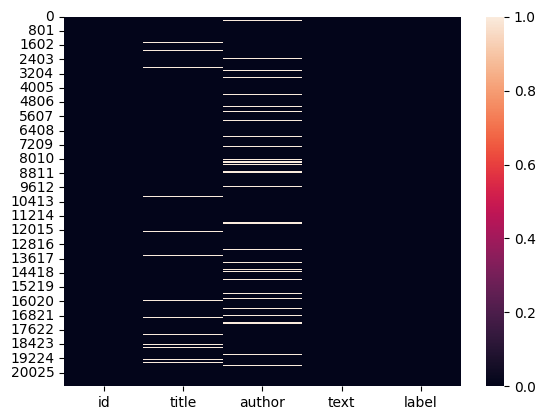

In [68]:
sp.heatmap(dataset.isnull())
plt.show()

In [69]:
dataset.select_dtypes(include="object").columns

Index(['title', 'author', 'text'], dtype='object')

**SimpleImputer is a class in scikit-learn library object with the strategy parameter set to "most_frequent", is a technique for imputing missing values in a dataset.**

**pip install scikit-learn for sklearn**

In [70]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="most_frequent")


**Here result will come in array so will store it in variable ar and then use it**

In [71]:
si.fit_transform(dataset[['title', 'author', 'text']])

array([['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It',
        'Darrell Lucus',
        'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen an

In [72]:
ar=si.fit_transform(dataset[['title', 'author', 'text']])

In [81]:
pd.DataFrame(ar,columns=dataset.select_dtypes(include="object").columns)

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


**To check is there any null value in columns store it in variable**

In [73]:
new_dataset=pd.DataFrame(ar,columns=dataset.select_dtypes(include="object").columns)

In [74]:
new_dataset.isnull().sum()

title     0
author    0
text      0
dtype: int64

**changes are not reflected in orignal dataset**

In [75]:
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

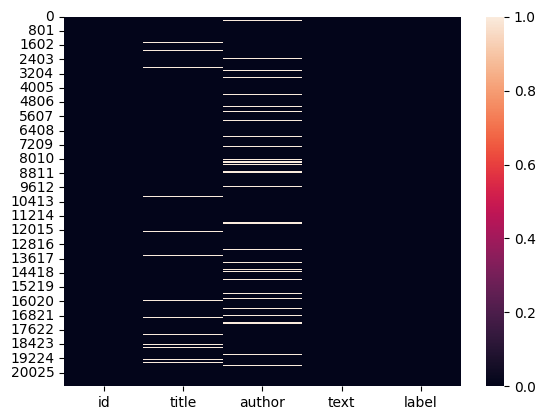

In [76]:
sp.heatmap(dataset.isnull())
plt.show()

**To do changes in orignal dataset**

In [77]:
dataset[['title', 'author', 'text']]=new_dataset

In [78]:
dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

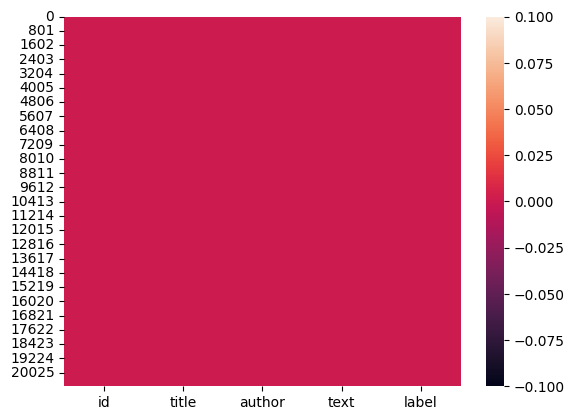

In [80]:
sp.heatmap(dataset.isnull())
plt.show()